<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.793339,49.637624,-2040.978855,-1914.547892,-263.863722,-1650.684170
1,0.0,1.0,76.491763,86.036571,5087.890165,5260.418499,930.776124,4329.642375
2,0.0,2.0,58.697152,22.728517,443.938529,535.364198,-1137.997935,1673.362133
3,0.0,3.0,39.330387,41.695603,1341.617201,1432.643192,-277.103075,1709.746267
4,0.0,4.0,21.941120,92.900970,-5279.804373,-5154.962283,1706.421937,-6861.384220
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.024866,30.080372,721.748333,785.853571,1277.052777,-491.199206
119996,999.0,116.0,41.529498,93.797773,-647.528510,-502.201239,213.164917,-715.366156
119997,999.0,117.0,29.801254,59.660408,-1973.701806,-1874.240144,840.972539,-2715.212683
119998,999.0,118.0,33.762673,57.552103,3123.653913,3224.968689,764.458826,2460.509863


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.793339,49.637624,-2040.978855,-1914.547892,-263.863722,-1650.684170
1,0.0,1.0,76.491763,86.036571,5087.890165,5260.418499,930.776124,4329.642375
2,0.0,2.0,58.697152,22.728517,443.938529,535.364198,-1137.997935,1673.362133
3,0.0,3.0,39.330387,41.695603,1341.617201,1432.643192,-277.103075,1709.746267
4,0.0,4.0,21.941120,92.900970,-5279.804373,-5154.962283,1706.421937,-6861.384220
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.024866,30.080372,721.748333,785.853571,1277.052777,-491.199206
119996,999.0,116.0,41.529498,93.797773,-647.528510,-502.201239,213.164917,-715.366156
119997,999.0,117.0,29.801254,59.660408,-1973.701806,-1874.240144,840.972539,-2715.212683
119998,999.0,118.0,33.762673,57.552103,3123.653913,3224.968689,764.458826,2460.509863


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    66.793339  49.637624 -2040.978855 -1914.547892  -263.863722   
      1.0    76.491763  86.036571  5087.890165  5260.418499   930.776124   
      2.0    58.697152  22.728517   443.938529   535.364198 -1137.997935   
      3.0    39.330387  41.695603  1341.617201  1432.643192  -277.103075   
      4.0    21.941120  92.900970 -5279.804373 -5154.962283  1706.421937   
...                ...        ...          ...          ...          ...   
999.0 115.0  24.024866  30.080372   721.748333   785.853571  1277.052777   
      116.0  41.529498  93.797773  -647.528510  -502.201239   213.164917   
      117.0  29.801254  59.660408 -1973.701806 -1874.240144   840.972539   
      118.0  33.762673  57.552103  3123.653913  3224.968689   764.458826   
      119.0  56.330039  79.428260  5948.712014  6094.470313    -8.182137   

                   e_hat  
rep   index               
0.0   0.0   -1650.684170  
      1.0    4329.642375  
      2.0    1673.362133  
      3.0    1709.746267  
      4.0   -6861.384220  
...                  ...  
999.0 115.0  -491.199206  
      116.0  -715.366156  
      117.0 -2715.212683  
      118.0  2460.509863  
      119.0  6102.652450  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    66.793339  49.637624 -2040.978855 -1914.547892  -263.863722   
      1.0    76.491763  86.036571  5087.890165  5260.418499   930.776124   
      2.0    58.697152  22.728517   443.938529   535.364198 -1137.997935   
      3.0    39.330387  41.695603  1341.617201  1432.643192  -277.103075   
      4.0    21.941120  92.900970 -5279.804373 -5154.962283  1706.421937   
...                ...        ...          ...          ...          ...   
999.0 115.0  24.024866  30.080372   721.748333   785.853571  1277.052777   
      116.0  41.529498  93.797773  -647.528510  -502.201239   213.164917   
      117.0  29.801254  59.660408 -1973.701806 -1874.240144   840.972539   
      118.0  33.762673  57.552103  3123.653913  3224.968689   764.458826   
      119.0  56.330039  79.428260  5948.712014  6094.470313    -8.182137   

                   e_hat  
rep   index               
0.0   0.0   -1650.684170  
      1.0    4329.642375  
      2.0    1673.362133  
      3.0    1709.746267  
      4.0   -6861.384220  
...                  ...  
999.0 115.0  -491.199206  
      116.0  -715.366156  
      117.0 -2715.212683  
      118.0  2460.509863  
      119.0  6102.652450  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.793339,49.637624,-2040.978855,-1914.547892,-263.863722,-1650.684170
1,0.0,1.0,76.491763,86.036571,5087.890165,5260.418499,930.776124,4329.642375
2,0.0,2.0,58.697152,22.728517,443.938529,535.364198,-1137.997935,1673.362133
3,0.0,3.0,39.330387,41.695603,1341.617201,1432.643192,-277.103075,1709.746267
4,0.0,4.0,21.941120,92.900970,-5279.804373,-5154.962283,1706.421937,-6861.384220
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.024866,30.080372,721.748333,785.853571,1277.052777,-491.199206
119996,999.0,116.0,41.529498,93.797773,-647.528510,-502.201239,213.164917,-715.366156
119997,999.0,117.0,29.801254,59.660408,-1973.701806,-1874.240144,840.972539,-2715.212683
119998,999.0,118.0,33.762673,57.552103,3123.653913,3224.968689,764.458826,2460.509863


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    66.793339  49.637624 -2040.978855 -1914.547892  -263.863722   
      1.0    76.491763  86.036571  5087.890165  5260.418499   930.776124   
      2.0    58.697152  22.728517   443.938529   535.364198 -1137.997935   
      3.0    39.330387  41.695603  1341.617201  1432.643192  -277.103075   
      4.0    21.941120  92.900970 -5279.804373 -5154.962283  1706.421937   
...                ...        ...          ...          ...          ...   
999.0 115.0  24.024866  30.080372   721.748333   785.853571  1277.052777   
      116.0  41.529498  93.797773  -647.528510  -502.201239   213.164917   
      117.0  29.801254  59.660408 -1973.701806 -1874.240144   840.972539   
      118.0  33.762673  57.552103  3123.653913  3224.968689   764.458826   
      119.0  56.330039  79.428260  5948.712014  6094.470313    -8.182137   

                   e_hat  
rep   index               
0.0   0.0   -1650.684170  
      1.0    4329.642375  
      2.0    1673.362133  
      3.0    1709.746267  
      4.0   -6861.384220  
...                  ...  
999.0 115.0  -491.199206  
      116.0  -715.366156  
      117.0 -2715.212683  
      118.0  2460.509863  
      119.0  6102.652450  

[120000 rows x 6 columns]

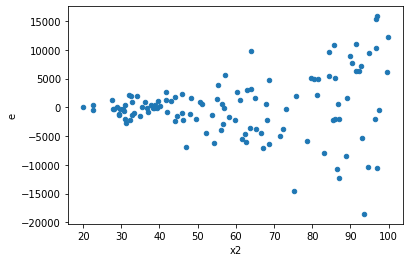

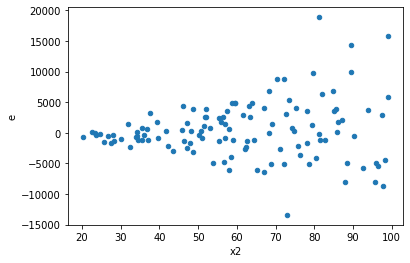

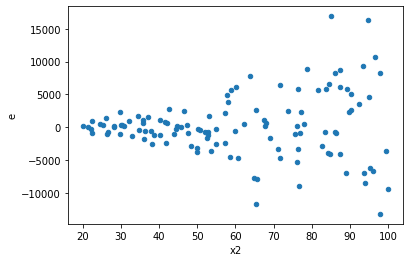

In [17]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[3.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,101473615.80084217,2672371139.817702,2205948.1695835255,58095024.778645694,26.3356254601457,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,290564936.21431434,1581680082.3696666,6316629.048137268,34384349.61673188,5.443465075232113,5.9311078937085426e-08,0.9999999703444605,2.9655539468542713e-08,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,967924882.1209062,1219930539.0133412,21041845.26349796,26520229.108985677,1.2603566263739838,0.4356371271359918,0.7821814364320041,0.2178185635679959,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,574840045.4356724,1637250203.072597,12496522.726862444,35592395.7189695,2.8481839706065046,0.0005509212995373769,0.9997245393502313,0.00027546064976868845,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,118864744.32271574,2203077268.3746624,2584016.1809286033,47892984.09510136,18.53432050796614,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,1015370591.0929873,1250785091.8296034,22073273.719412766,27190980.25716529,1.2318508166394755,0.4822715053130393,0.7588642473434803,0.24113575265651965,Reject001=1 : Homoscedasticity
9.0,46.0,46.0,49329536.866680704,2889381650.2546597,1072381.2362321892,62812644.57075347,58.57305447775798,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,46.0,46.0,102687619.39136635,2188597046.9135866,2232339.551986225,47578196.672034495,21.31315400907616,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,46.0,46.0,214243278.05309677,1671987490.4038758,4657462.566371669,36347554.139214694,7.804153790017629,1.2287082462592025e-10,0.9999999999385646,6.143541231296012e-11,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,101473615.80084217,2672371139.817702,2205948.1695835255,58095024.778645694,26.3356254601457,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,290564936.21431434,1581680082.3696666,6316629.048137268,34384349.61673188,5.443465075232113,5.9311078937085426e-08,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,967924882.1209062,1219930539.0133412,21041845.26349796,26520229.108985677,1.2603566263739838,0.4356371271359918,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,574840045.4356724,1637250203.072597,12496522.726862444,35592395.7189695,2.8481839706065046,0.0005509212995373769,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,864288981.9221082,842018873.6609743,18788890.91135018,18304758.12306466,0.974233030008543,0.9298413007448288,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,118864744.32271574,2203077268.3746624,2584016.1809286033,47892984.09510136,18.53432050796614,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,1967120259.5741696,192086617.1366133,42763483.903786294,4175796.024708985,0.09764863952862499,7.896521117729887e-13,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,1962707966.710472,888332536.0078236,42667564.49370591,19311576.869735297,0.4526055587865587,0.008288419904132847,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,1015370591.0929873,1250785091.8296034,22073273.719412766,27190980.25716529,1.2318508166394755,0.4822715053130393,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    767
Reject001=1 : Homoscedasticity      233
Name: Result_test, dtype: int64